In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def spkd_visualized(tli, tlj, cost):

    nspi = len(tli)
    nspj = len(tlj)

    if cost == 0:
        print("Cost is 0, only comparing spike counts.")
        return abs(nspi - nspj)
    elif cost == float('inf'):
        print("Cost is infinity, summing spike counts.")
        return nspi + nspj

    scr = np.zeros((nspi + 1, nspj + 1))

    scr[:, 0] = np.arange(nspi + 1)
    scr[0, :] = np.arange(nspj + 1)

    matrices = [] 
    descriptions = []  
    matrices.append(scr.copy())  
    descriptions.append("Initialization")  

    if nspi > 0 and nspj > 0:
        for i in range(1, nspi + 1):
            for j in range(1, nspj + 1):
                delete_cost = scr[i - 1, j] + 1
                insert_cost = scr[i, j - 1] + 1
                shift_cost = scr[i - 1, j - 1] + cost * abs(tli[i - 1] - tlj[j - 1])
                scr[i, j] = min(delete_cost, insert_cost, shift_cost)

                if scr[i, j] == delete_cost:
                    operation = f" Deletion (G[i-1, j] + 1) - Remove spike {tli[i - 1]}"
                elif scr[i, j] == insert_cost:
                    operation = f"Insertion (G[i, j-1] + 1) - Add spike {tlj[j - 1]}"
                else:
                    operation = f"Substitution (G[i-1, j-1] + {cost} × |{tli[i - 1]} - {tlj[j - 1]}|) - Shift spike {tli[i - 1]} to match {tlj[j - 1]}"


                matrices.append(scr.copy())
                descriptions.append(f"Step {i},{j}: {operation}")

    visualize_matrices_grid(matrices, tli, tlj, descriptions)
    return scr[nspi, nspj]




def visualize_matrices_grid(matrices, tli, tlj, descriptions):

    num_matrices = len(matrices)
    cols = 3  
    rows = (num_matrices + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    axes = axes.flatten()

    for idx, (matrix, description) in enumerate(zip(matrices, descriptions)):
        ax = axes[idx]
        im = ax.imshow(matrix, cmap='coolwarm', interpolation='nearest', origin='upper')
        fig.colorbar(im, ax=ax, orientation='vertical')
        title_font_size = 7
        ax.set_title(f"Step {idx}\n{description}", fontsize=title_font_size)

        ax.set_xlabel("Spike Train 2 (tlj)")
        ax.set_ylabel("Spike Train 1 (tli)")
        ax.set_xticks(np.arange(len(tlj) + 1))
        ax.set_yticks(np.arange(len(tli) + 1))
        # ax.set_xticklabels(["-"] + [f"{x:.2f}" for x in tlj])
        # ax.set_yticklabels(["-"] + [f"{x:.2f}" for x in tli])
        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                ax.text(j, i, f"{matrix[i, j]:.2f}", ha="center", va="center", color="black")

    # Hide unused subplots
    for ax in axes[num_matrices:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [10]:
st_1= [1, 15, 113.5, 116, 119]
st_2 = [1.5, 2, 15.1,  114, 118, 1100]

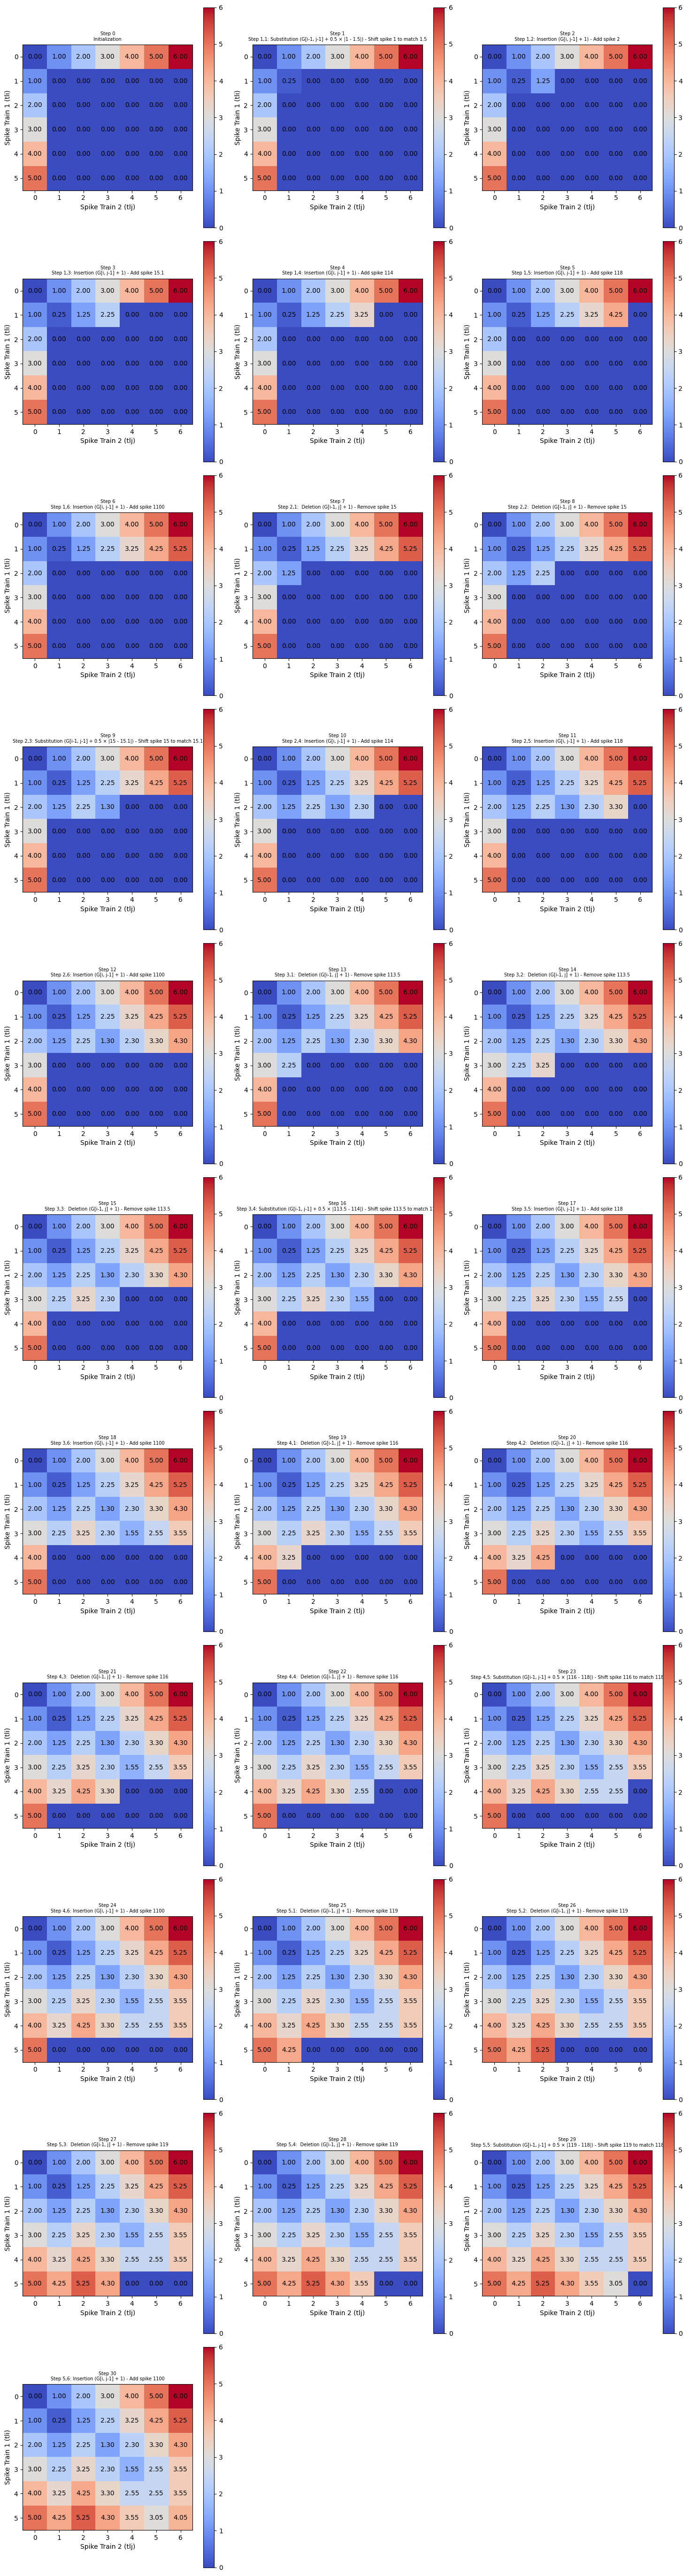

4.05

In [11]:
spkd_visualized(st_1, st_2, 0.5)